# Imports.

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Loading summary tables.

In [6]:
# Summary tables for resources except time.
lxc_df = pd.read_csv('lxc_summary.csv')
docker_df = pd.read_csv('docker_summary.csv')
podman_df = pd.read_csv('podman_summary.csv')

# Summary tables for time metric.
lxc_time_df = pd.read_csv('lxc_time.csv')
docker_time_df = pd.read_csv('docker_time.csv')
podman_time_df = pd.read_csv('podman_time.csv')

# Plot functions for resources (except time).

## get_global_metric_max_across_commands()

In [18]:
def get_global_metric_max_across_commands(metric, lxc_df, docker_df, podman_df):
    lxc_metric_max = lxc_df[metric].max()
    docker_metric_max = docker_df[metric].max()
    podman_metric_max = podman_df[metric].max()
    return min(lxc_metric_max, docker_metric_max, podman_metric_max)

## plot_metric()

In [39]:
def plot_metric(metric, ylabel, title, lxc_command_df, docker_command_df, podman_command_df, y_max):
    # Extract data for each tool and command
    lxc_metric = lxc_command_df.groupby('concurrency')[metric].mean()
    docker_metric = docker_command_df.groupby('concurrency')[metric].mean()
    podman_metric = podman_command_df.groupby('concurrency')[metric].mean()

    # Fill missing values for metrics from each tool with 0.
    lxc_metric = lxc_metric.reindex(concurrency, fill_value=0)
    docker_metric = docker_metric.reindex(concurrency, fill_value=0)
    podman_metric = podman_metric.reindex(concurrency, fill_value=0)

    # Plot
    x = np.arange(len(concurrency))  # Label locations
    width = 0.2  # Width of the bars

    fig, ax = plt.subplots()

    # Bar plots for each tool
    if not lxc_metric.empty:
        ax.bar(x - width, lxc_metric, width, label='LXD')
    if not docker_metric.empty:
        ax.bar(x, docker_metric, width, label='Docker')
    if not podman_metric.empty:
        ax.bar(x + width, podman_metric, width, label='Podman')

    # Labels and titles
    ax.set_xlabel('Concurrency')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(concurrency)
    ax.legend()

    # Set y-axis limit
    if y_max is not None:
      ax.set_ylim([0, y_max])

    # Show the plot
    plt.show()

## plot_metric_for_command()

In [20]:
def plot_metric_for_command(command, metric, ylabel, title, y_max):
    # Filter dataframes by command.
    lxc_command_df = lxc_df[lxc_df['command'] == command]
    docker_command_df = docker_df[docker_df['command'] == command]
    podman_command_df = podman_df[podman_df['command'] == command]

    # Plot the dataframes.
    plot_metric(metric, ylabel, title, lxc_command_df, docker_command_df, podman_command_df, y_max)

# Plot function for time metric.

## get_global_max_of_time_across_commands()

In [28]:
def get_global_max_of_time_across_commands(lxc_time_df, docker_time_df, podman_time_df):
    """
    This function calculates the global maximum time value across all specified commands
    (load, start, stop, remove_container, remove_image) for the LXD, Docker, and Podman
    engines. It returns the smallest maximum time among all container engines and commands.

    Parameters:
    - lxc_time_df: DataFrame containing time metrics for LXD.
    - docker_time_df: DataFrame containing time metrics for Docker.
    - podman_time_df: DataFrame containing time metrics for Podman.

    Returns:
    - global_max_time: The minimum of the maximum time values across all container engines
      for the specified commands.
    """
    # Initialize the global minimum of the maximum values
    global_max_time = float('-inf')

    # Commands to consider for time metrics
    time_commands = ['load', 'start', 'stop', 'remove_container', 'remove_image']

    # Iterate through each command to find the smallest maximum value across all engines
    for command in time_commands:
        # Find the maximum time value for each engine
        lxc_time_max = lxc_time_df.groupby('concurrency')[command].max().max()
        docker_time_max = docker_time_df.groupby('concurrency')[command].max().max()
        podman_time_max = podman_time_df.groupby('concurrency')[command].max().max()

        # Update global_max_time with the smallest of the maximum values across engines
        global_max_time = max(global_max_time, max(lxc_time_max, docker_time_max, podman_time_max))

    return global_max_time

## plot_time_metric_for_command()



In [40]:
def plot_time_metric_for_command(command, ylabel, title, y_max):
    # Extract data for each tool and command
    lxc_command = lxc_time_df.groupby('concurrency')[command].mean()
    docker_command = docker_time_df.groupby('concurrency')[command].mean()
    podman_command = podman_time_df.groupby('concurrency')[command].mean()

    # Fill missing values for metrics from each tool with 0.
    lxc_command = lxc_command.reindex(concurrency, fill_value=0)
    docker_command = docker_command.reindex(concurrency, fill_value=0)
    podman_command = podman_command.reindex(concurrency, fill_value=0)

    # Plot
    x = np.arange(len(concurrency))  # Label locations
    width = 0.2  # Width of the bars

    fig, ax = plt.subplots()

    # Bar plots for each tool
    if not lxc_command.empty:
        ax.bar(x - width, lxc_command, width, label='LXD')
    if not docker_command.empty:
        ax.bar(x, docker_command, width, label='Docker')
    if not podman_command.empty:
        ax.bar(x + width, podman_command, width, label='Podman')

    # Labels and titles
    ax.set_xlabel('Concurrency')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(concurrency)
    ax.legend()

    # Set consistent y-axis limits across all tools.
    if y_max is not None:
      y_max = y_max * 1.1 # Add some padding for better visualization.
      ax.set_ylim([0, y_max])

    # Show the plot
    plt.show()

# Main.

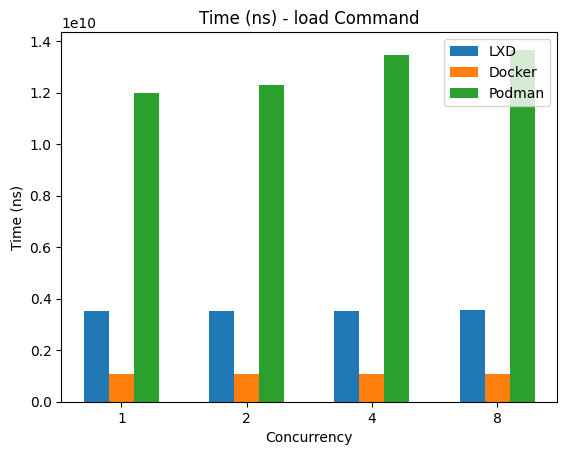

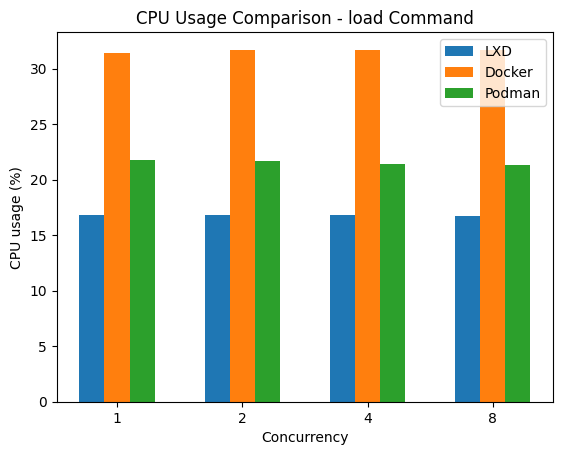

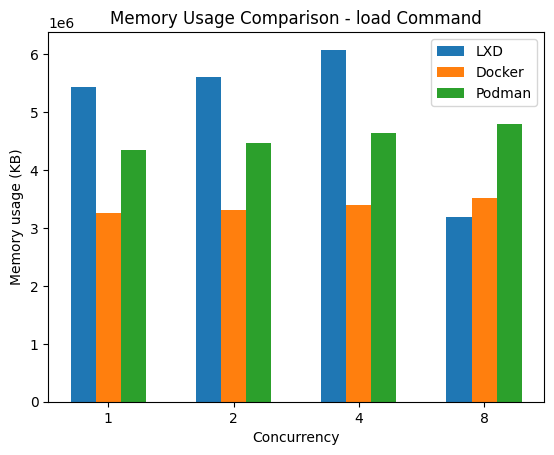

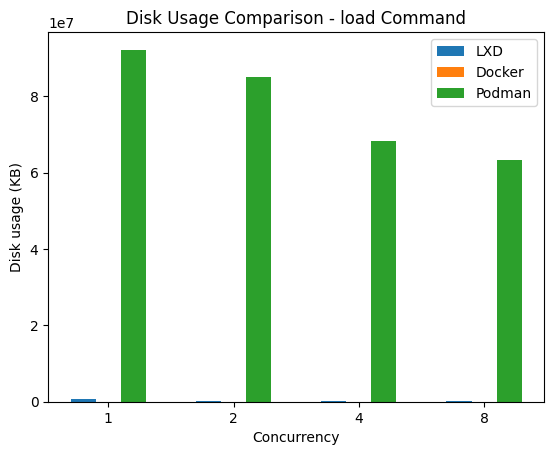

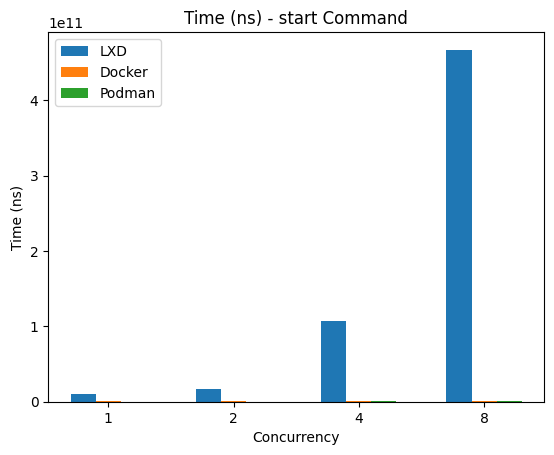

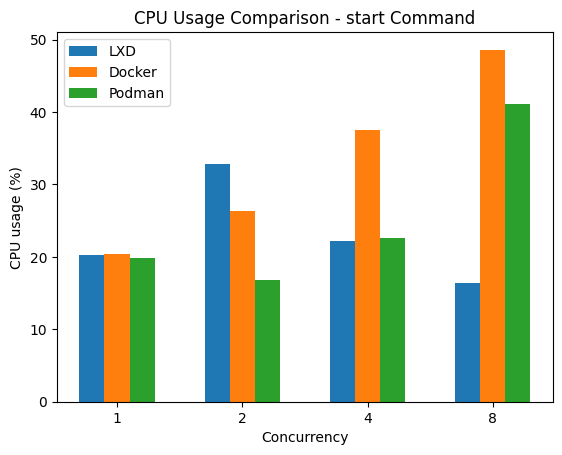

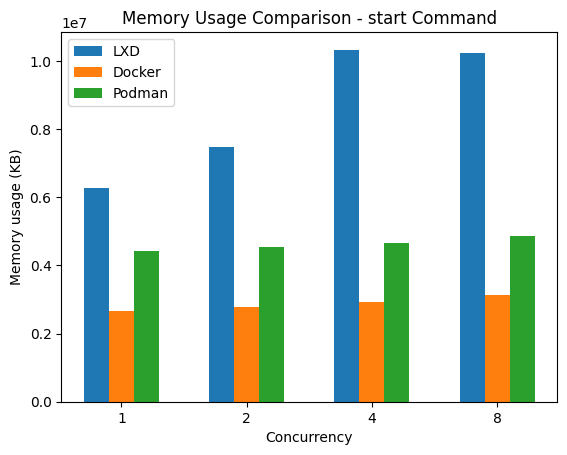

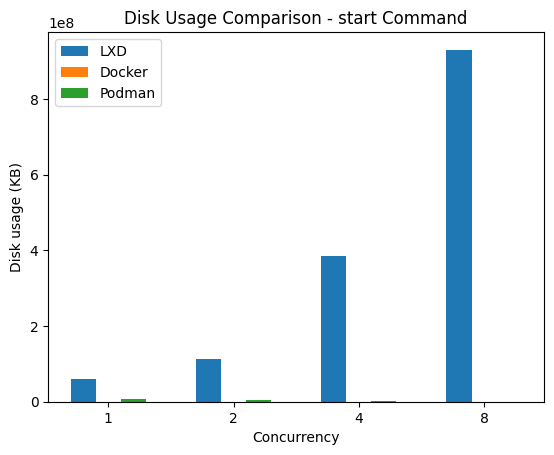

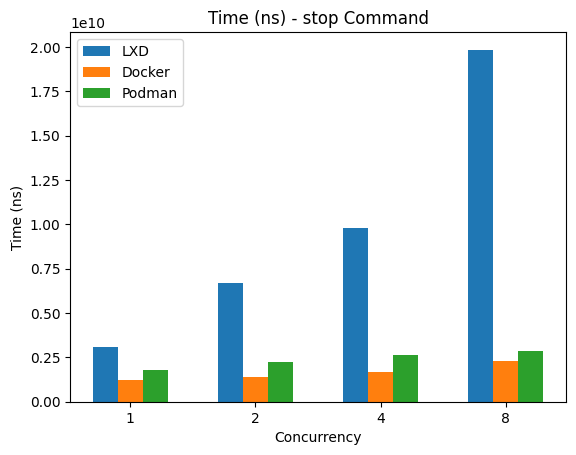

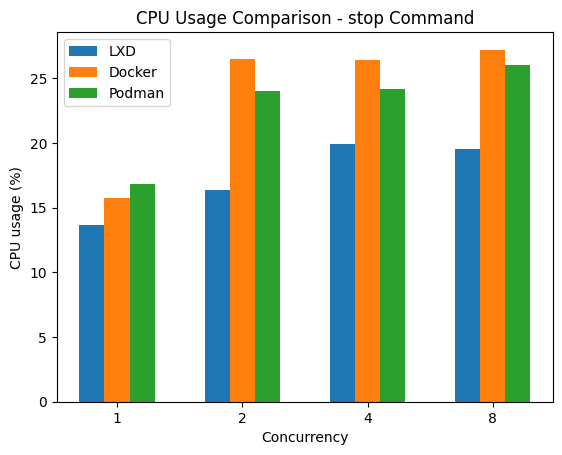

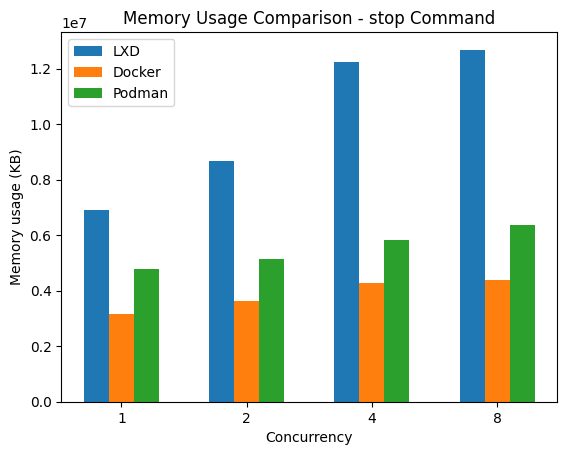

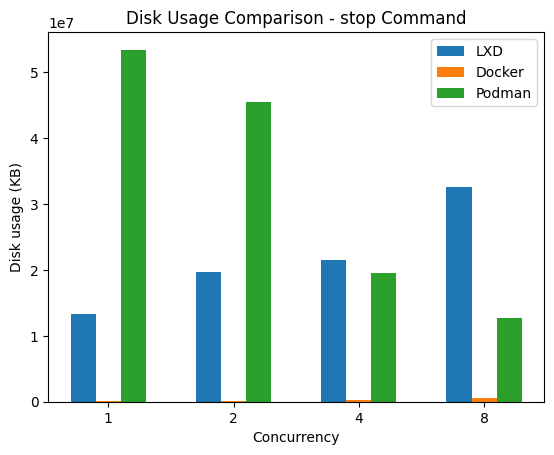

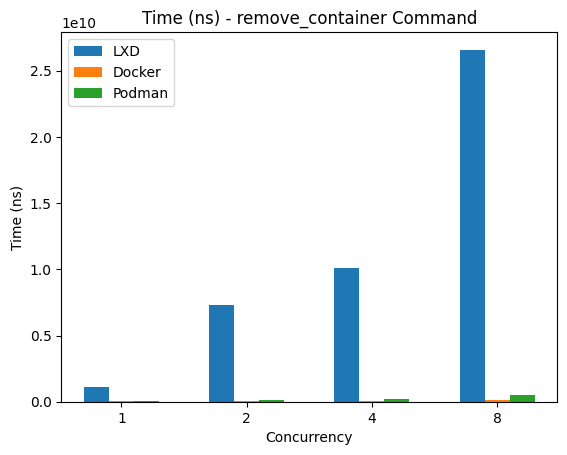

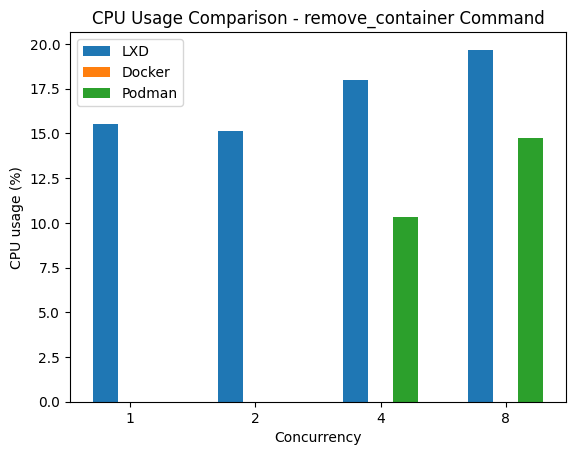

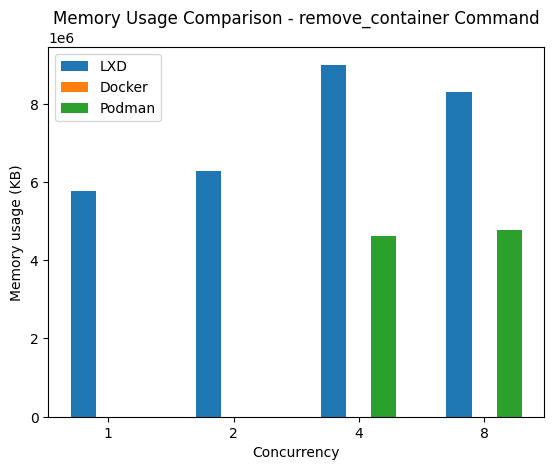

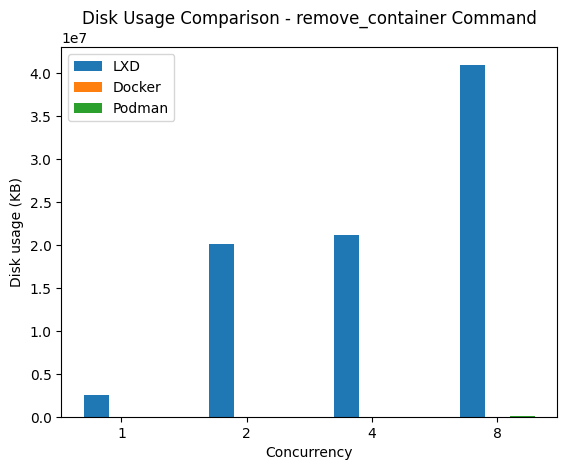

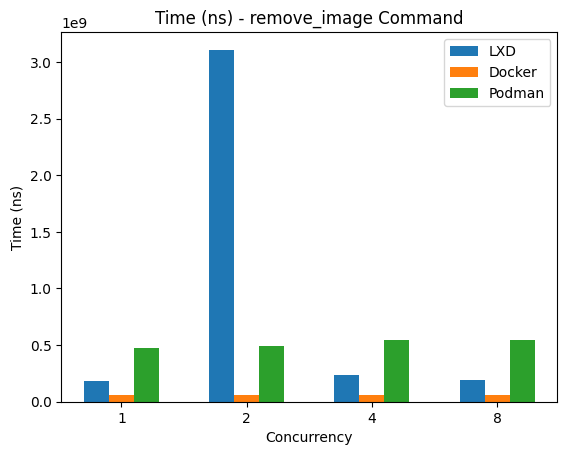

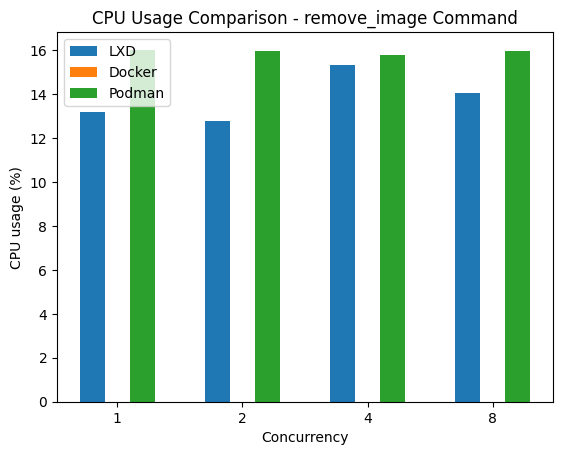

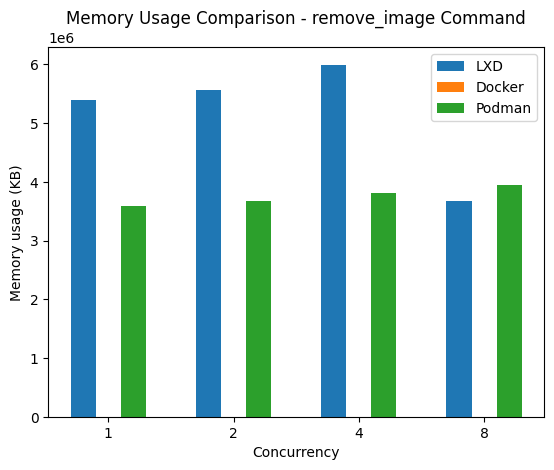

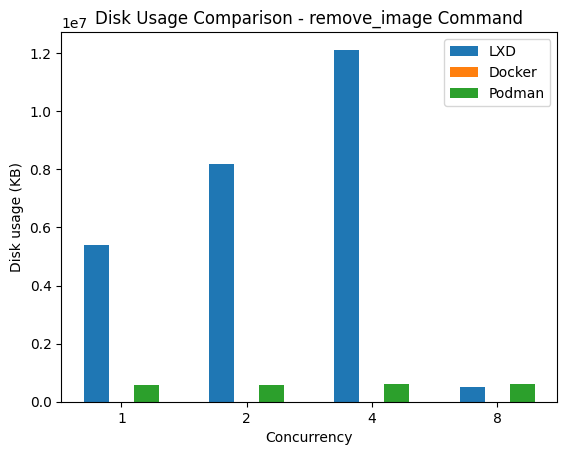

In [41]:
# Generate plots for CPU Usage, Memory and Disk Usage for different commands.
concurrency = lxc_df['concurrency'].unique()  # Assuming the same concurrency in all tables
commands = [ 'load', 'start', 'stop', 'remove_container', 'remove_image']

# Get global y-axis limits for the time metric across all tools.
time_y_max = get_global_max_of_time_across_commands(lxc_time_df, docker_time_df, podman_time_df)  # TODO: rename function to better explain what it does.

# Get global y-axis limits for the each metric across all commands and engines. Note: not used as this needs to be fixed. TODO(robertnant): fix.
# for metric in metrics:
#    metric_to_max_value[metric] = get_global_metric_max_across_commands(metric, lxc_df, docker_df, podman_df)
#    print(metric_to_max_value[metric])

for command in commands:
    suffix = command + ' Command'
    plot_time_metric_for_command(command, 'Time (ns)', 'Time (ns) - ' + command + ' Command', None)
    plot_metric_for_command(command, 'cpu', 'CPU usage (%)', 'CPU Usage Comparison - ' + suffix, None)
    plot_metric_for_command(command, 'memory', 'Memory usage (KB)', 'Memory Usage Comparison - ' + suffix, None)
    plot_metric_for_command(command, 'disk', 'Disk usage (KB)', 'Disk Usage Comparison - ' + suffix, None)